<a href="https://colab.research.google.com/github/Thepradnya01/OIBSIP/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OASIS INFOBYTE TASK 2: EMAIL SPAM DETECTION WITH MACHINE LEARNING**

Problem Statement:We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

In [ ]:
#Import Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head(10)

In [ ]:
df.shape

**1. Data Cleaning**

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

Renaming the columns

In [ ]:
df.rename(columns={ 'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()                            #spam= 1 ,ham= 0



In [ ]:
df['Target']= encoder.fit_transform(df['Target'])


In [ ]:
df.head()

In [ ]:
df.isnull().sum()              #checking missing values

In [ ]:
#remove duplicates

df= df.drop_duplicates(keep='first')
df

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

**2. EDA**

In [ ]:
#TO KNOW HOW MANY SPAMS AND HOW MANY HAMS ARE PRESENT IN DATA

In [ ]:
df['Target'].value_counts()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#Therefore data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

In [ ]:
#check number of characters in every message

In [ ]:
df['num_characters']= df['Text'].apply(len)

In [ ]:
df.head()

In [ ]:
#numbers of words


In [ ]:
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df[['num_characters','Num_words','num_sentences']].describe()

In [ ]:
df[df['Target']==0][['num_characters','Num_words','num_sentences']].describe()      #description of all ham messages

In [ ]:
df[df['Target']==1][['num_characters','Num_words','num_sentences']].describe()      #description of all spam messages
         

**Histograms**

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')


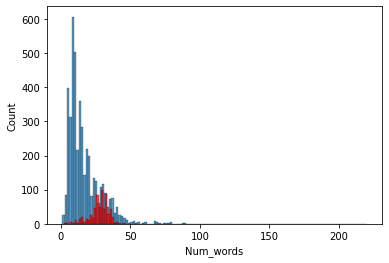

In [ ]:
sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'],color='red')


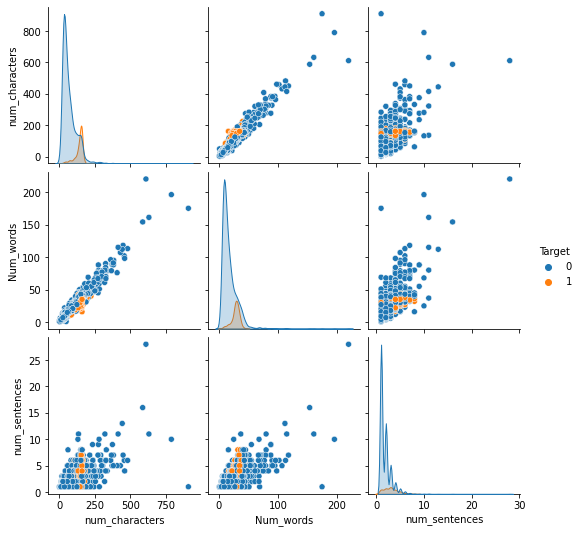

In [ ]:
sns.pairplot(df,hue='Target')

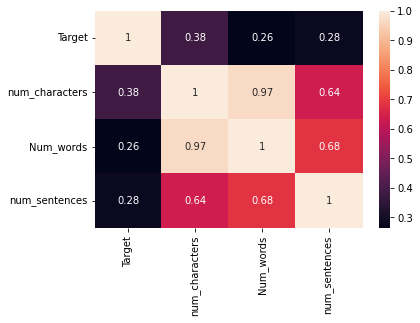

In [ ]:
sns.heatmap(df.corr(),annot=True)

**3. Data Preprocessing**

In [ ]:
def transform_text(text):
  text= text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text("HIIII, how are  20 % %you?")

['hiiii', '20']

In [ ]:
from nltk